# Example Counting Rainy Days

In [1]:
import numpy as np
import pandas as pd

In [2]:
#use panda to extract rainfall inches as a numpy array

rainfall = pd.read_csv('../data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0
inches.shape


(365,)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

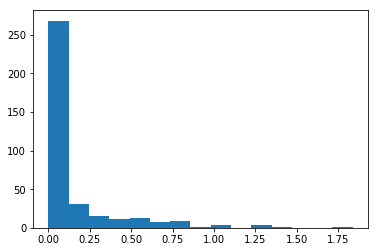

In [4]:
plt.hist(inches, 15)
plt.show()

# Comparator operator as funcs

In [6]:
x = np.array([1,2,3,4,5])

In [7]:
x < 3 ##less than

array([ True,  True, False, False, False])

In [8]:
x > 3 ##greater than

array([False, False, False,  True,  True])

In [9]:
x <= 3

array([ True,  True,  True, False, False])

In [10]:
x >= 3 ##greater than or igual

array([False, False,  True,  True,  True])

In [11]:
x != 3 #igual 

array([ True,  True, False,  True,  True])

In [12]:
x == 3

array([False, False,  True, False, False])

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [13]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

As in the case of arithmetic operators, the comparison operators are implemented as ufuncs in NumPy; for example, when you write x < 3, internally NumPy uses np.less(x, 3). A summary of the comparison operators and their equivalent ufunc is shown here:

Just as in the case of arithmetic ufuncs, these will work on arrays of any size and shape. Here is a two-dimensional example:

In [24]:
#https://stackoverflow.com/questions/22994423/difference-between-np-random-seed-and-np-random-randomstate
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [25]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In each case, the result is a Boolean array, and NumPy provides a number of straightforward patterns for working with these Boolean results.

# Working with Boolean Arrays

In [26]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


# Counting entries

To count the number of True entries in a Boolean array, np.count_nonzero is useful:

In [27]:
#how many values less than 6?
np.count_nonzero(x < 6)

8

We see that there are eight array entries that are less than 6. Another way to get at this information is to use np.sum; in this case, False is interpreted as 0, and True is interpreted as 1

In [28]:
np.sum(x < 6)

8

The benefic of sum() is that like with other Numpy aggregation functions, this summation can be done along rows or columns as well

In [29]:
## how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

This Counts the number of values less than 6 in each row the matrix.

if we're interested in quickly checking whether any or all the values are true, we can use(you guested it) np.any or np.all

In [30]:
# are there any values greater than 8?
np.any(x > 8)


True

In [31]:
# are there any values less than 0?
np.any(x < 0)


False

In [32]:
#are all values less than 6?
np.all(x < 10)

True

In [33]:
#are all values equal to 6?
np.all(x == 6)

False

np.all and np.any can be used along particular axes as well. For example:



In [34]:
#are all values in each row less than 8?
np.all(x < 6, axis=1)

array([ True, False, False])

# Boolean operators

In [38]:
np.sum((inches > 0.5) & (inches < 1))

29

In [41]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [45]:
print('Number Days without rains', np.sum(inches == 0))
print("Number Days with rains", np.sum(inches != 0))
print("Number days with more than 0.5 inches: ", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches < 0.2) & (inches > 0)))

Number Days without rains 215
Number Days with rains 150
Number days with more than 0.5 inches:  37
Rainy days with < 0.2 inches  : 75


# bollean arrays as Masks

In [47]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

we can obtain a Boolean array for this conditional easily, as we've already seen.

In [48]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Now to select these values from the array, we can simply index on this Boolean array; this is known as a masking operation:

In [49]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [62]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [63]:
print(sum(summer))
print(sum(rainy))

print(sum(summer & rainy))



89
150
14


In [64]:
inches[summer & rainy]


array([0.07086614, 0.09055118, 0.01181102, 0.75984252, 0.01968504,
       0.01968504, 0.5       , 0.8503937 , 0.03937008, 0.33070866,
       0.0511811 , 0.11811024, 0.01968504, 0.01181102])

Notice that the corresponding bits of the binary representation are compared in order to yield the result.

When you have an array of Boolean values in NumPy, this can be thought of as a string of bits where 1 = True and 0 = False, and the result of & and | operates similarly to above:

In [66]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [70]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [68]:
x


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

So remember this: and and or perform a single Boolean evaluation on an entire object, while & and | perform multiple Boolean evaluations on the content (the individual bits or bytes) of an object. For Boolean NumPy arrays, the latter is nearly always the desired operation.